In [45]:
import pandas as pd
from pandas_datareader import data as wb


tickers = ['CLR.SI','G3B.SI','Z74.SI']
df = pd.DataFrame()
for ticker in tickers:
    df[ticker] = wb.DataReader(ticker, data_source='yahoo',
                              start='2005-1-1')['Adj Close']
df.head()

,CLR.SI,G3B.SI,Z74.SI
Date,,,
2017-10-30,0.944486,3.278471,3.260643
2017-10-31,0.944486,3.278471,3.234766
2017-11-01,0.940794,3.287812,3.234766
2017-11-02,0.938024,3.287812,3.234766
2017-11-03,0.937100,3.287812,3.252018


In [46]:
# Create ticker to name mapping
mapper = {'CLR.SI':'Lion phillip sreit',
          'G3B.SI':'Nikko AM STI ETF',
          'Z74.SI':'Singtel'
         }

mapper

{'CLR.SI': 'Lion phillip sreit',
 'G3B.SI': 'Nikko AM STI ETF',
 'Z74.SI': 'Singtel'}

In [47]:
df.columns = list(map(mapper.get, df.columns))

# list(map(dictionary.get, list_to_be_mapped))

Text(0.5, 1.0, 'Relative Strength')

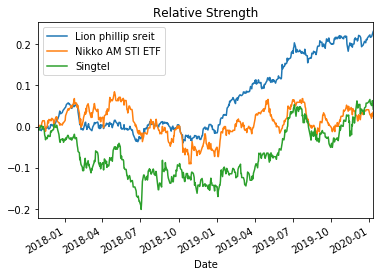

In [48]:
import matplotlib.pyplot as plt
df.pct_change().cumsum().plot()
plt.title('Relative Strength')

Text(0.5, 1.0, 'Relative Strength')

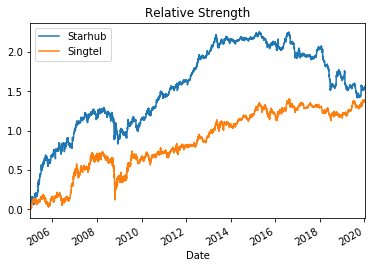

In [51]:
import pandas as pd
from pandas_datareader import data as wb


tickers = ['CC3.SI','Z74.SI']
df = pd.DataFrame()
for ticker in tickers:
    df[ticker] = wb.DataReader(ticker, data_source='yahoo',
                              start='2005-1-1')['Adj Close']
df.head()


# Create ticker to name mapping
mapper = {
          'CC3.SI':'Starhub',
          'Z74.SI':'Singtel'
         }

mapper

df.columns = list(map(mapper.get, df.columns))

# list(map(dictionary.get, list_to_be_mapped))

import matplotlib.pyplot as plt
df.pct_change().cumsum().plot()
plt.title('Relative Strength')



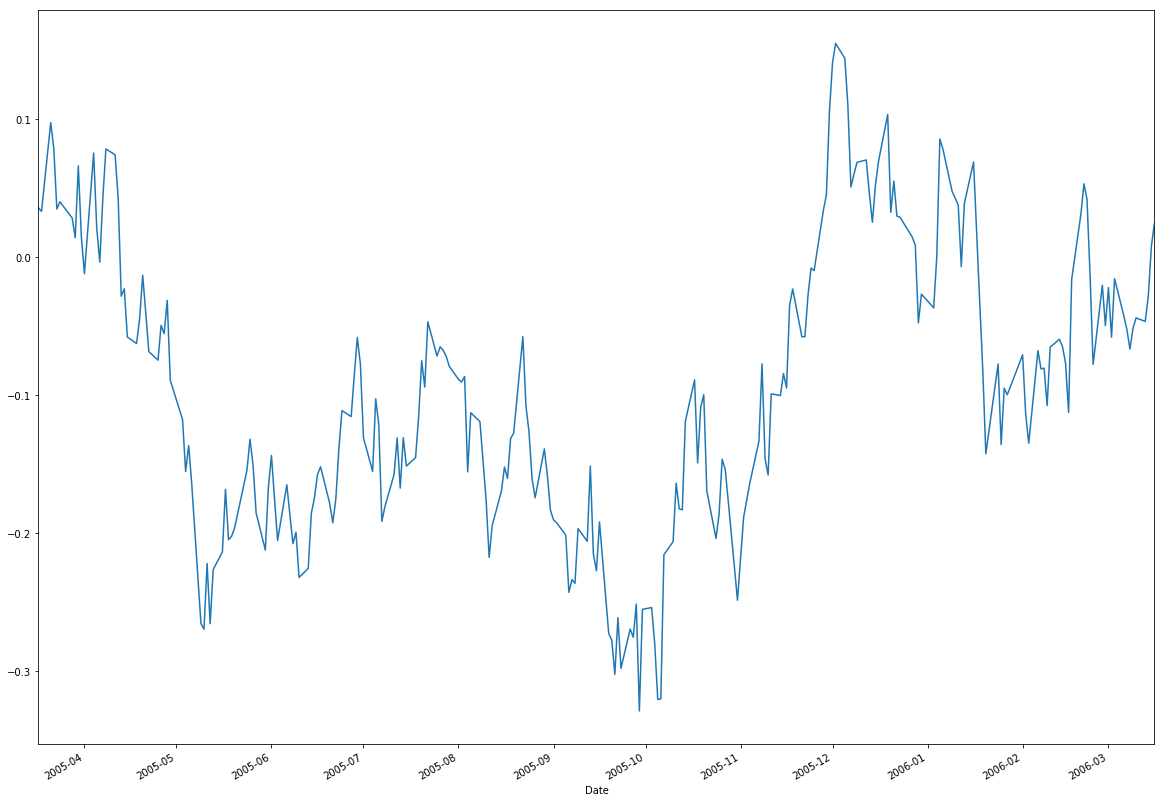

In [76]:
# Compare sharpe
plt.figure(figsize=(20,15))
period = 50
sharpe = df.pct_change().rolling(period).mean() / df.pct_change().rolling(period).std()
sharpe = sharpe.dropna()
(sharpe['Singtel'] - sharpe['Starhub'])[:250].plot()